# Introduction

This project is done as part of requirements to graduate from Intro to Programming Nano Degree (IPND) by Udacity. I have chosen Data Analytics path to focus on. Therefore, this final project is to do investigation on 1D and 2D data.

I document the steps that I have done in this project and share my findings in this report using the following outline. 
1. Problem statement - what are the questions?
2. Data wrangling - data acquisitions and data cleaning
3. Data exploration - finding patterns in the data sets
4. Draw conclusion - make hipotesis or predictions 
5. Communicate findings - data visualisation and project report

Steps 3, 4 and 5 will be presented together for each analysis done to try to answer the each questions. 

Note: Ensure that the codes are run in sequence once each. Otherwise, it could produce errors. Especially, where there are permanent modification of data set. In this case, please repeat to run the code from the very beginning. However, individual command to print a preview of data or a whole data set can be executed repeatedly by following the the instruction in the code's comment.  



## Section 1 - Problem Statements

The data sets are chosen from Gapminder World.

The nature of data available in Gapminder are related to lives of people in different countries across the years based on various indicators. The main reason I chose this data set is because it could be relatable to me and sparks my curiousity about how conditions in different countries affect they way we live. There are a lot of possible questions that can be asked by comparing these indicators and investigate their patterns.

While there are some better questions could be asked and more useful for the world, some of them are quite common and have been analysed too often. Therefore, I would like to explore some of the aspects that more related to my daily life and my generation, which are alcohol, food, and work life. I am curious about:
* Do people in richer countries work longer or less hours?
* Do people drink more alcohol in countries where they work longer hours?
* Culturally wise, I've heard some countries tend to spend their social life over the food and some over the drinks. Is this true? Do countries where people tend to drink more would eat less, and vice versa?
* How is food consumption in various countries?
* Does food consumption affect life expectancies? If so, how? Would we be able to see how over-consumption of food lead to lower life expectancies?




## Section 2 - Data Wrangling


### 2.1 Data Acquisition

To do the analysis on the questions above, I will use the following indicators:
* GDP (per capita, USD, inflation-adjusted))
* Work hours (per week per person)
* Alcohol consumption (per adult (15+) in litres)
* Food consumption (kilocalories per person per day)
* Life expectancies (years old)

All the data is downloaded from Gapminder.org in excel format. I did the export to CSV format outside this notebook.

Most of the data that were imported are presented in the tables that have 'name of countries' in the rows and relevant 'year' of corresponding data for each country as the header for each columns. They can be assigned to either numPy 2D array or pandas 2D data frame. While from skimming through the data used in this project we could tell that the data will be the same data type, which is float, I will use pandas 2D data frame instead. 

Eventhough processing the data in numPy might be faster, for the size of these data sets, it is not a concern and the difference might be unnoticable. From the lessons that I saw in Udacity modules, it seems that Panda can process this type of data in more efficient way, which will reduce the complexity of my program. Pandas also has more functionality that might be useful in the future, should I decide to use this data further with other type of indicators.

In [1]:
# Import packages that for Data Analytics.
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import polyfit, poly1d

In [2]:
# Import CSVs into pandas DataFrame.
gdp = pd.read_csv ('gdp-per-capita.csv')
work_hours = pd.read_csv('work-hours-per-week.csv', sep = None, engine='python')
alcohol_consumption = pd.read_csv('alcohol-consumption.csv', sep = None, engine='python')
food_consumption = pd.read_csv('food-consumption.csv', sep = None, engine='python')
life_expectancy = pd.read_csv('life-expectancy.csv')

There were some errors when I tried to import the files due to non-standard alphabets used in the name of some countries. This was fixed directly in the CSV files. Apart from that, no data cleaning is done outside of this Jupyter Notebook.

### 2.2 Data Cleaning

Before starting to work with the data, I want to make sure the data is clean and in a good quality to be further used properly for the exploration and analysis. I will convert each data sets into a good and standardised format of data frame. Then, I will further investigate if there are still problem with the quality of each data set before we begin to explore and analyse the correlation in between the indicators.

Also, as I would like to know the lifestyle of my generation, which in general is classified as Millenials. Therefore, I only want to use quite recent data, from the 90s onwards. Old data would be irrelevant to the situation that I want to investigate and also most likely the data are not available across all data sets of have a lot of missing values.


#### 2.2.1 Fixing Data Types

To clean data sets into good format of data frames, I will work on data sets in the following steps:
* Step 1 - Print a preview of the data set (the first 5 rows) to see the condition of the data and what needs to be done.
* Step 2 - Assign 'years' as headers of columns and 'countries' as indexes.
* Step 3 - Remove the data from before 1990.
* Step 4 - Remove the columns and or rows that don't have any content. I do this step before further cleaning in data quality, as not to waste time to work on data that cannot be used or will be removed later on.
* Step 5 - Assign the data to their appropriate types.


In [3]:
# Step 1 - Print the first 5 rows of the dataset for a preview.

# Remove the hash (#) from the following comments so it will turn into a code to print preview of a particular data set.
# It can only print one data set preview at a time, whichever the latest.

#gdp.head()
#work_hours.head()
#alcohol_consumption.head()
#food_consumption.head()
#life_expectancy.head()

In [4]:
# Step 2 -Assign 'years' as headers of columns and 'countries' as indexes.

# From the preview, we can see the indexes are still using number of positions and doesn't have consistent name.

# Assign the first column with countries names as index.
gdp.set_index("Country", inplace=True)
work_hours.set_index("Working hours per week", inplace=True)
alcohol_consumption.set_index("Unnamed: 0", inplace=True)
food_consumption.set_index("Unnamed: 0", inplace=True)
life_expectancy.set_index("Country", inplace=True)

# Update the name of headers of indexes, so every index header will be called 'Country'
work_hours.index.rename('Country', inplace=True)
alcohol_consumption.index.rename('Country', inplace=True)
food_consumption.index.rename('Country', inplace=True)



In [5]:
# Step 3 - Remove the data from before 1990.

# I create new copies and kept the original imported data sets.
gdp_recent = gdp.loc[:,'1990':]
work_hours_recent = work_hours.loc[:,'1990':]
alcohol_consumption_recent = alcohol_consumption.loc[:,'1990':]
food_consumption_recent = food_consumption.loc[:,'1990':]
life_expectancy_recent = life_expectancy.loc[:,'1990':]


In [6]:
# Step 4 - Remove the columns and or rows that don't have any content.

gdp_cleandata = gdp_recent.dropna(axis=0, how='all')
gdp_cleandata = gdp_cleandata.dropna(axis=1, how='all')

work_hours_cleandata = work_hours_recent.dropna(axis=0, how='all')
work_hours_cleandata = work_hours_cleandata.dropna(axis=1, how='all')

alcohol_consumption_cleandata = alcohol_consumption_recent.dropna(axis=0, how='all')
alcohol_consumption_cleandata = alcohol_consumption_cleandata.dropna(axis=1, how='all')

food_consumption_cleandata = food_consumption_recent.dropna(axis=0, how='all')
food_consumption_cleandata = food_consumption_cleandata.dropna(axis=1, how='all')

life_expectancy_cleandata = life_expectancy_recent.dropna(axis=0, how='all')
life_expectancy_cleandata = life_expectancy_cleandata.dropna(axis=1, how='all')


From printing the preview of data above, I saw that they are continous data that are in fractions. Therefore, I will update their data type into float and round the decimals up to 2 decimals so the data is tidier and easier to be read.

In [7]:
# Step 5 - Assign the data to float data type.

gdp_df = pd.DataFrame(data=gdp_cleandata, dtype=np.float).round(2)
work_hours_df = pd.DataFrame(data=work_hours_cleandata, dtype=np.float).round(2)
alcohol_consumption_df = pd.DataFrame(data=alcohol_consumption_cleandata, dtype=np.float).round(2)
food_consumption_df = pd.DataFrame(data=food_consumption_cleandata, dtype=np.float).round(2)
life_expectancy_df = pd.DataFrame(data=life_expectancy_cleandata, dtype=np.float).round(2)







#### 2.2.2 Problems in the Data

There are some limitations in Gapminder datasets, which are inconsistencies of data availability for some years or some countries. To see where the problems lie, we need to investigate the data and identify the abnormalities across 5 datasets that we are using. Only then, we can clean and improve the quality of data to be further explored in the next step.

Let's start this by printing previews of new data sets.

In [8]:
# Preview the corrected data set.

# Remove the hash (#) from the following comments so it will turn into a code to print preview of a particular data set.
# It can only print one data set preview at a time, whichever the latest.

#gdp_df.head()
#work_hours_df.head()
#alcohol_consumption_df.head()
#food_consumption_df.head()
#life_expectancy_df.head()

At this point, data with no values are still marked with NaN (Not a Number) and kept within the data frame.


##### Availibilty of data in specific year across whole data sets
From printing data sets above, we could see that available data are not really up to date. Even for some, it only have data for some years. Below are the highlights:

In [9]:
#### Last year of available data.
print ('GDP data is available up to year ' + gdp_df.dtypes.index[-1])
print ('Work hours data is available up to year ' + work_hours_df.dtypes.index[-1])
print ('Alcohol consumption data is available up to year ' + alcohol_consumption_df.dtypes.index[-1])
print ('Food consumption data is available up to year ' + food_consumption_df.dtypes.index[-1])
print ('Life Expectancies data is available up to year ' + life_expectancy_df.dtypes.index[-1])

GDP data is available up to year 2011
Work hours data is available up to year 2007
Alcohol consumption data is available up to year 2008
Food consumption data is available up to year 2007
Life Expectancies data is available up to year 2013


Therefore, we can't really use data from beyond 2007.

Apart from that, when I print out the first 5 rows of data of alcohol consumption, it looks like most columns have NaNs. However, somehow these columns are not deleted by our formula earlier. It could mean that there are some rows that have values within these columns. Let's check how much data they have and whether we can use them or not.  

In [10]:
alcohol_consumption_df.count()

1990      4
1991      1
1992      2
1993      4
1994      6
1995      4
1996      2
1998      1
2000      1
2001      1
2002      1
2003      1
2004      1
2005    188
2006      1
2007      1
2008    187
dtype: int64

We can see that most of those columns only have less than 10 data points. It's not something that would help in our data analysis to answer our questions. From alcohol consumption data set, only data in year 2005 and 2008 that are good to be used. However, since we will do analysis with other data sets and our previous investigation showed us that we only have enough data across all data sets up to 2007, only data from 2005 that we can use.

Based on these, I will only use data from 2005 from each of our data sets, which potentially could be used as pandas series or data frame, depends on the pairing analysis that we will do to answer the questions.

I will create new data sets for these series (instead of modifying the original or the previous cleaned-up versions of the data sets). The reason being is because perhaps in the future I would like to explore further the data within other years.


##### Extract series from each DataFrame for year 2005 and remove missing values

In [11]:
gdp_2005 = gdp_df.loc[:,'2005'].dropna()
work_hours_2005 = work_hours_df.loc[:,'2005'].dropna()
alcohol_consumption_2005 = alcohol_consumption_df.loc[:,'2005'].dropna()
food_consumption_2005 = food_consumption_df.loc[:,'2005'].dropna()
life_expectancy_2005 = life_expectancy_df.loc[:,'2005'].dropna()

##### Printing each series to spot abnormalities, if any

I will only do a quick review if there are more abnormalities that can be spot from seeing the data. Therefore, I will comment-out the commands below and change remove the # to print them quickly and turn it back to # after scanning the result.

In [12]:
# Remove the hash (#) from the following comments so it will turn into a code to print a particular series.
# It can only print one series at a time, whichever the latest.

#print (gdp_2005)
#print (work_hours_2005)
#print (alcohol_consumption_2005)
#print (food_consumption_2005)
#print (life_expectancy_2005)

Most of data looks good. However, there are only 30 usable data points in work_hours_2005. Since this is one of indicator in the first two questions, our analysis might be limited to these countries. While we still can do the analysis, it might not be as accurate, as we are missing countries to represent Africa and most of Asia and South America. Further analysis will be done in answering Q1 in section 3.3 below.  

## Section 3 - Data Exploration, Conclusion and Findings


### 3.1 Refining the Question

Some of the questions might not be able to be answered just by straight using our datasets. Before we attempt directly to answer the questions, let's get better understanding of the datasets and the approach that we can do to answer the questions. We may need to see the questions from different point of views or ask additional questions in between.

During the process in cleaning up the data, I got a bit more familiar about what the data is about and how the remaining clean data looks like. I would like to reformulate my questions into the following:
* Do countries with lower GDP demand longer work-hours?
* Does longer work-hours lead into higher alcohol consumption?
* Is there any strong correlation in between alcohol consumption and food consumption? 
* How food consumption in various countries affect life expectancies?
* If I combine all these indicators together, would there be stronger correlation in between indicators that I have not included in my initial questions?






### 3.2 Methodology

Based on the questions above, I will analyse the pairings of the data and determine whether they will use 1D or 2D data analysis approach. Following that, I will do analysis using statistic and correlation to draw conclusion. Data will be mapped into charts or graphs to visualise the distribution and make it easier for the reader to make sense of the result.




#### 3.2.1 1D Data Analysis

1D data analysis will be done by descriptive analysis about the data and investigating how strong the correlation of two pairing indicators in series. 

Statistic properties (eg. Count, Mean, Standard Deviation) will be printed to see an overview of the series. Also, the distribution of the data will be plotted to see how well the data spread and give a quick indication if there are areas that we could explore further in case of abnormalities within the data. If there is any abnormalities, we will go back to do Data Cleaning before proceeding further to analyse the correlation.

In order to measure the correlation in between two series, in general we want to compare the following:
* Number of countries where the both values are above or both are below the mean
* Number of countries where one value is above and the other one is below the mean
We will find these numbers using the following function where we will do vectorised operations using Bitwise (boolean) 'and' and  'or'.

In [13]:
def indicators_correlation (indicator1, indicator2):
    """
    This function takes two type float series to see how many data points of index 
    go to the same direction and different direction. This will give a quick overview of
    how those two series are correlated, either positively or negatively. 
    
    If the result gives one of the number extremely higher compare to another, it indicates strong correlation.
    If the result between two numbers are relatively equal, it indicates that the correlation is weak to no correlation.
    
    This formula is adapted from Udacity IPND lessons.
    """
    both_above = (indicator1 > indicator1.mean()) & (indicator2 > indicator2.mean())
    both_below = (indicator1 < indicator1.mean()) & (indicator2 < indicator2.mean())
    same_direction = both_above | both_below
    num_country_same_direction = same_direction.sum()
    num_country_diff_direction = (len(indicator1) - num_country_same_direction)
    return (num_country_same_direction,num_country_diff_direction)

While it will not be the main method to measure the correlation in between two series, I will run a quick Pearson correlation just to see whether it's aligned with the result from the function above or not.

After running these steps, I will draw a conclusion and share my findings.



#### 3.2.2 2D Data Analysis

2D data analysis will be done within a DataFrame that has 2 or more indicators. I will investigate the statistic overview about the data by using describe function and plot the distribution of all indicators in the same chart after they are normalised. If there is something out of ordinary, I will investigate further and might go back to Data Wrangling phase. 

If the data can be accepted within our defined requirements, I will proceed to calculate the Pearson values in order to analyse the correlation in between indicators. The result will be visualised in a scatter plot chart and readily to be interpreted by the readers. I will present a conclusion and share my findings.

### 3.3 Perform Data Analysis and Share Findings

--------------------------------------------------------------------------------------------------------------------------------
#### Q1: Do countries with lower GDP demand longer work-hours?

My initial hipothesis is:
* H0: There is quite strong negative correlation in between countries' GDP and Work Hours.

Countries with higher GDP demand less working hours, due to maturity of government and companies regulation to work-life balance. Workers also get paid more equally, closer to countries' living costs mean, which means they don't have to work in more than one job or get overtime payment to support their life. The other factor that might play some role is the level of education and culture where it empowers its citizen to speak up and understand more about better quality of life.

On the other side, countries with lower GDP might allow longer work hours, due to lack of government regulation and company policy for better work-life balance. These countries are also famous to inequality in their countries between the riches and poors, and many live below poverty line. These might lead to necessity to work longer hours or more jobs. Low level of education and culture may prohibit safe space to speak up to ask for better condition to improve quality of life.



To analyse this question, I will use two panda series, which are GDP and Work Hours data from 2005. The analysis will be done using 1D data analysis approach.

When a country's GDP is above the mean, do their working population work longer hours (or vice versa)?
* Number of countries where both of the Work Hours and GDP values are above or below the mean
* Number of countries where the Work Hours value is above the mean and the GDP values is below the mean, or vice versa.

From the previous prints, we know that Work Hours number of data points are very limited compare to the other data sets. Therefore, when GDP serie is mapped to corresponding countries in Work Hours data set, its length will be truncated at least equal if not less than length of Work Hours serie.

Only data where the countries appear in both series will be used.

In [14]:
# Removing data of countries without matches.
q1_pd = pd.concat([work_hours_2005, gdp_2005], axis=1).dropna()

# Update the name of headers. This will improve readability of the data.
q1_pd.columns.values[0] = 'Work Hours'
q1_pd.columns.values[1] = 'GDP'

# Re-split the data into 2 series for each indicator.
q1_work_hours = q1_pd.iloc[:,0]
q1_gdp = q1_pd.iloc[:,1]

In [15]:
q1_pd.describe()

,Work Hours,GDP
count,28.000000,28.000000
mean,32.935357,23728.094286
std,3.282979,12263.369908
min,26.440000,4887.370000
25%,30.722500,14793.120000
50%,33.165000,24614.060000
75%,34.592500,31313.185000
max,39.480000,51927.360000


C:\Users\Sisi Florensia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


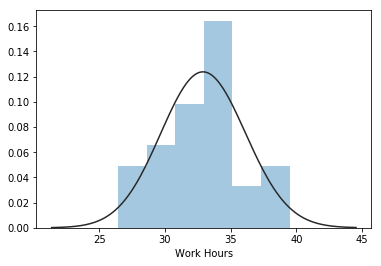

In [16]:
x = q1_work_hours
sns.distplot(x, kde=False, fit=stats.gamma);


C:\Users\Sisi Florensia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


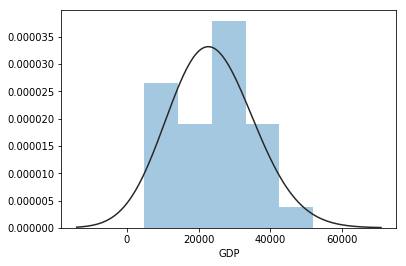

In [17]:
x = q1_gdp
sns.distplot(x, kde=False, fit=stats.gamma);

From running describe function, we could see that there are only 28 countries that are matches (instead of 30 from total data population in Work Hours). Regardless, we still have >90% of the expected data. So, based on Pareto Principle 80-20 rule, I dont think it is important to spend more time to investigate further what happened with the other 2 data points. 

Also, the distribution of each data sets look relatively normal. Therefore, there's not a lot of outliers present in these pairings of data sets. Apart from limitation of counts of data points, it doesn't seem there are further issues with the data. 

The range of the Work Hours in these countries, with GDP of USD 4,887.37 - USD 51,927.36 per person per year, is in between 26.44 hours per week to 39.48 hours per week. 

Next, let's see how is the correlation in between these two indicators using the function we created earlier to analyse 1D data.

In [18]:
# Calculate how many countries that go to same direction and how many go their opposite way, using the function earlier.
indicators_correlation (q1_work_hours,q1_gdp)

(9, 19)

There are 9 out of 28 countries where work hours and GDP are both below or above the mean. This is almost 1/3 of our data.
While the rest 19 out of 28 countries where work hours and GDP level go oppposit way. This is about 2/3 our our data.

Based on this, it seems there could be some negative correlation in between these two parameters: in some countries where the GDP is high, people work less hours than in countries with lower GDP. However, this may be not always the case.

Let's see what we can see from Pearson correlation value. While it is not the best way to measure correlation of two simple data sets, we can just quickly run this to compare the result with correlation analysis we did before.

In [19]:
q1_pd.corr()

,Work Hours,GDP
Work Hours,1.000000,-0.569682
GDP,-0.569682,1.000000


The Pearson value is also showing some notably negative correlation, though might not be as strong. This is aligned with the previous analysis.

###### Q1 Disclaimer:
We are missing data from most low income countries. Let's look at how the GDP data looks like before we mapped it with countries available in Work Hours data. 

In [20]:
gdp_2005.dropna().describe()

count      194.00000
mean      8545.10433
std      13440.15365
min         92.37000
25%        628.41250
50%       2284.19000
75%       9656.00000
max      81827.96000
Name: 2005, dtype: float64

C:\Users\Sisi Florensia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


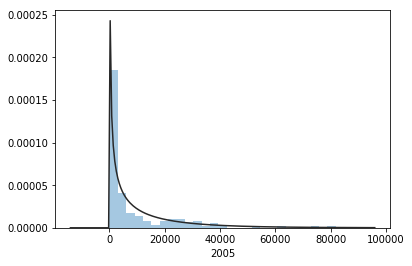

In [21]:
x = gdp_2005.dropna()
sns.distplot(x, kde=False, fit=stats.gamma);

We can see that original data with 194 countries (out of 195 countries in the world) is very heavy on the low GDP countries. Somehow, in the data that we can use to compare with Work Hours are distributed normally.

Also, we can notice that in the original data, minimum GDP is USD 92.37. While in the available data we investigate for this question is USD 4,887.37. Also, the mean from total population is USD 8,545.10 and the mean from Q1 data set that we used is USD 2,3728.09. That is a huge difference!

Let's do a relative comparison on how many countries from low GDP and high GDP that were left out in Q1 analysis above, where the GDPs are lower than minimum value or higher than maximum of Q1 matched data set (with 28 countries). 

In [22]:
# Copy the gdp_2005 series to a new series for the test. This is done so the original data set will not be modified.
gdp_2005_test = pd.DataFrame(data=gdp_2005, dtype=np.float).round(2)

# Create a new column to indicate where the gdp is less than the minimum GDP value we use for Q1. 
gdp_2005_test['lower_than_q1_gdp_min'] = np.where(gdp_2005_test<4887.37, True, False)

# Count how many low income countries that have been ignored in Work Hours data set.
gdp_2005_test['lower_than_q1_gdp_min'].sum()

121

In [23]:
# Create a new column to indicate where the gdp is higher than the maximum GDP value we use for Q1. 
gdp_2005_test['higher_than_q1_gdp_max'] = np.where(gdp_2005_test['2005']>51927.36, True, False)

# Count how many low income countries that have been ignored in Work Hours data set.
gdp_2005_test['higher_than_q1_gdp_max'].sum()

3

In [24]:
# Print a quick review to see if we did the classification correctly.
gdp_2005_test.head()

,2005,lower_than_q1_gdp_min,higher_than_q1_gdp_max
Country,,,
Albania,1525.72,True,False
Algeria,2115.19,True,False
Andorra,20737.95,False,False
Angola,404.27,True,False
Antigua and Barbuda,11102.93,False,False


In [25]:
# Print a quick result to see if the data makes sense.
gdp_2005_test.loc[(gdp_2005_test['higher_than_q1_gdp_max'] == True)]

,2005,lower_than_q1_gdp_min,higher_than_q1_gdp_max
Country,,,
Bermuda,62143.34,False,True
Liechtenstein,74525.01,False,True
Monaco,81827.96,False,True


From the comparison above, we could see that most of countries were not included in this analysis (due to data unavailability). Most of them are from low GDP countries that are below Q1 data set's range, which is 121 out of 195 countries. That's 62% of total population! While on the other side, only 3 countries from high GDP were not inside the range of Q1 data. 

For this reason, I don't think that the sample (Q1 data set with 28 countries) that we used even enough to represent conditions of real world. For that reason, the result from the analysis also should not represent the real condition for whole world.

However, we might be able to use this analysis if we rephrase the questions. For example, "how is correlation in between Work Hours and GDP in developed countries"? Other option is to use better and more complete data set that measures Work Hours in all countries. These could be done in the future, outside this project.



###### Q1 Conclusion

From 28 countries that we can investigate, there are some negative correlation in between GDP of countries and how many hours their people work. In countries where the GDP is higher, probably people work less hours, and vice versa. This is aligned to my inital hipothesis. 

The factors that may influence this negative correlation in between GDP and Work Hours may include:
* Government regulations
* Mature company policies and standards
* Level of education
* Open culture
* Equality / Inequality

It could be great to investigate these factors together in the future.

Below is the graphic representation of how Work Hours and GDP correlate.


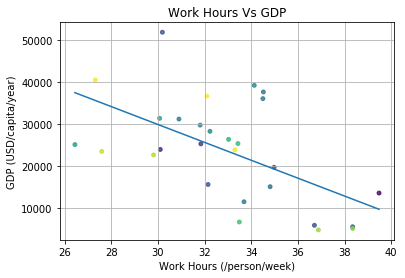

In [26]:
# Visualising the data and correlation using scatter plot. 
# The size of the bubbles are static and not influenced by any parameter. 
N = len(q1_pd)
x = q1_pd['Work Hours']
y = q1_pd['GDP']
colors = np.random.rand(N)
area = 15  # 0 to 15 point radius. It is static.

plt.scatter(x, y, s=area, c=colors, alpha=0.8)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('Work Hours (/person/week)')
plt.ylabel('GDP (USD/capita/year)')
plt.title('Work Hours Vs GDP')
plt.grid(True)
plt.show()

However, with most of the countries (mostly from lower GDP value) are out of range of our available data set, this analysis is missing a big picture. Without more complete data set, it cannot be presented as an analysis for the whole world in general. Although, in some aspect, this analysis still can be used to represent developed or some developing countries. 

Further future investigation can be done by limiting the parameters to smaller scope or by acquiring better data set. 

--------------------------------------------------------------------------------------------------------------------------------


##### Q2: Does longer work-hours lead into higher alcohol consumption?

My initial hipothesis is:
* H0: There is some weak positive correlation in between Work Hours and alcohol consumption.

Longer work hours might lead to higher level of stress, where it may trigger the needs to compesate by consuming alcohol.

To analyse this question, I will use two panda series, which are Work Hours and Alcohol Consumption data from 2005. The analysis will be done using 1D data analysis approach.

When a country's population works more hours than the mean, do their alcohol consumption tends to rise (or vice versa)? 
I will use the same approach and functions from question 1 (Q1), as the characteristic of the data are similar.

The condition of Work Hours data set is also the same with Q1, where its data points are very limited compare to the length of data for alcohol consumption. Therefore, when alcohol_consumption serie is mapped to corresponding countries in Work Hours data set, its length will also be truncated at least equal if not less than length of Work Hours serie.

In [27]:
q2_pd = pd.concat([work_hours_2005, alcohol_consumption_2005], axis=1).dropna()
q2_pd.columns.values[0] = 'Work Hours'
q2_pd.columns.values[1] = 'Alcohol Consumption'

q2_work_hours = q2_pd.iloc[:,0]
q2_alcohol_consumption = q2_pd.iloc[:,1]

In [28]:
q2_pd.describe()

,Work Hours,Alcohol Consumption
count,27.000000,27.000000
mean,32.914815,11.028889
std,3.343683,2.861368
min,26.440000,2.870000
25%,30.545000,9.695000
50%,33.030000,10.770000
75%,34.665000,13.245000
max,39.480000,16.270000


C:\Users\Sisi Florensia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


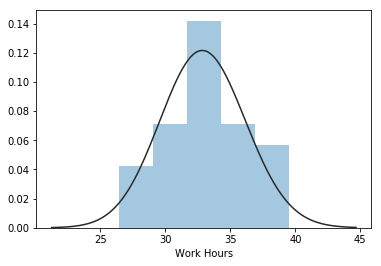

In [29]:
x = q2_work_hours
sns.distplot(x, kde=False, fit=stats.gamma);

C:\Users\Sisi Florensia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


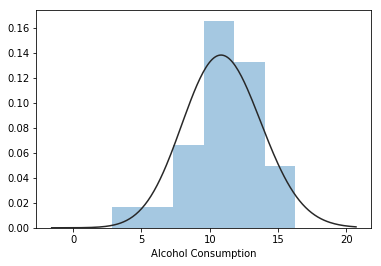

In [30]:
x = q2_alcohol_consumption
sns.distplot(x, kde=False, fit=stats.gamma);

From running describe function, we could see that there are only 27 countries that are matches (instead of 30 from total data population in Work Hours). Regardless, we still have about 90% of the expected data. So the same as in Q1 analysis, based on Pareto Principle 80-20 rule, I dont think it is important to spend more time to investigate further what happened with the other 3 data points.

The distribution of Work Hours data set look relatively normal. However, while Alcohol Consumption data slightly left skewed. There might be very few outliers that we need to investigate. Also, from describe function, we could see that the minimum value is 2.87 but the 25% is 9.695. This 25% value is closer to the mean than min value, and also the distance of 25% to the max value is almost as close as the distance to the min value. This does not seem right.

Let's take a look at the data points on the left distribution closer.

In [31]:
# Print data below the mean.
q2_alcohol_consumption[(q2_alcohol_consumption <= q2_alcohol_consumption.mean())]

Australia        10.02
Belgium          10.77
Canada            9.77
Greece           10.75
Iceland           6.31
Italy            10.68
Japan             8.03
Mexico            8.42
Netherlands      10.05
New Zealand       9.62
Norway            7.81
Sweden           10.10
Turkey            2.87
United States     9.44
Name: Alcohol Consumption, dtype: float64

From printing data above, we could see that Turkey is the only country that has value way below the others in the list. As we know, Turkey is a country that is in both Europe and Asia where majority of population (>90%) are muslim. Religion wise, in Islam, it is prohibited to drink alcohol. Therefore, this condition of low alcohol consumption maybe irrelevant to be included in this analysis where we want to see its relation to work hours, as it could be strongly afftected by religion instead (which is outside our scope of investigation) than work hours. Therefore, I will remove Turkey from our analysis.

Note: To see how alcohol comsumption compares to other muslim-majority country, please see the analysis in Q2 Disclaimer section below.

In [32]:
# Removing Turkey and it's data from the Q2 data.
q2_pd = q2_pd.drop('Turkey')

# Reslicing to get new series for both indicators.
q2_work_hours = q2_pd.iloc[:,0]
q2_alcohol_consumption = q2_pd.iloc[:,1]

In [33]:
q2_pd.describe()

,Work Hours,Alcohol Consumption
count,26.000000,26.000000
mean,32.762308,11.342692
std,3.312753,2.397877
min,26.440000,6.310000
25%,30.367500,9.832500
50%,32.630000,10.915000
75%,34.515000,13.247500
max,39.480000,16.270000


The data distribution looks better now. I will use these updated data with 26 countries for this analysis. The range of Alcohol Consumption in these countries is now 6.31 - 16.27 litres per capita per year. While the range of Work Hours is still in between 26.44 hours per week to 39.48 hours per week.

Of course, since we are using the same Work Hours data set from Q1, we also have limitation caused by this data set. As in previous question's analysis, I will also do this analysis separately in Q2 Disclaimer section. 

First, let's see how is the correlation in between these two indicators using the function we created to analyse 1D data.

In [34]:
# Calculate how many countries that go to same direction and how many go their opposite way, using the function earlier.
indicators_correlation (q2_work_hours,q2_alcohol_consumption)

(9, 17)

There are 9 out of 26 countries where work hours and alcohol consumption are both below or above the mean. This is about 1/3 of our data. While the rest 17 out of 26 countries where work hours and alcohol consumption level go oppposite way. This is almost 2/3 our our data.

I am a bit surprised by this result. I was expecting to see some positive correlation, even though not a strong one. This result is on contrary of my initial hipothesis. Based on this result, it seems there could be some negative correlation in between these two parameters: in some countries where the Work Hours is longer, people drink less alcohol than in countries where people work less hours.

Let's see what we can see from Pearson correlation value. While it is not the best way to measure correlation of two simple data series, we can just quickly run this to compare the result with correlation analysis we did before.

In [35]:
q2_pd.corr()

,Work Hours,Alcohol Consumption
Work Hours,1.000000,0.019864
Alcohol Consumption,0.019864,1.000000


The Pearson value is showing almost no correlation in between two indicators. However, if there's any, it shows a very weak positive correlation. This doesn't aligned with the result of indicators_correlation nor to my initial hipothesis.

###### Q2 Disclaimer:
During the process to map countries in Alcohol Consumption data to available countries in Work Hours data, we lost quite a lot of data points. Let's take a look whether at least the ones that we have can represent similar distribution.

In [36]:
alcohol_consumption_2005.dropna().describe()

count    188.000000
mean       6.540851
std        4.628977
min        0.020000
25%        2.582500
50%        5.990000
75%        9.777500
max       18.280000
Name: 2005, dtype: float64

C:\Users\Sisi Florensia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


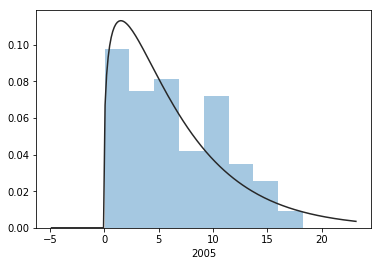

In [37]:
x = alcohol_consumption_2005.dropna()
sns.distplot(x, kde=False, fit=stats.gamma);

Almost like the case with countries in GDP data previously, we can see that original data with 194 countries (out of 195 countries in the world) is quite heavy on countries with low alcohol_consumption. Somehow, in the data that we can use to compare with Work Hours, Alcohol consumption data is distributed normally.

Although, the range of data that were ignored may not be as big as in the previous analysis in Q1, some significant range of data are still not included. Minimum alcohol consumption in original data is 0.02 litres, while minimum value in the data we can use in Q2 analysis is 2.87 litres. On the other side, maximum alcohol consumption from total population is 18.28 litres and the maximum value from Q2 analysis is 16.27 litres. Relatively to width spread of data range in both, these numbers don't look so extreme. 

However, the difference in mean values between both data sets is quite significant. The mean from total population is 6.54 litres, and the mean from the Q2 data set (the one with 27 countries) is 11.02 litres. 

Let's do a relative comparison on how many countries with low and high alcohol consumption that were left out in Q2 analysis above, where the consumptions are lower than minimum value or higher than maximum of Q2 matched data set (the one with 27 countries). 

In [38]:
# Copy the alcohol_consumption_2005 series to a new series for the test. 
# This is done so the original data set will not be modified.
alcohol_consumption_2005_test = pd.DataFrame(data=alcohol_consumption_2005, dtype=np.float).round(2)

# Create a new column to indicate where the alcohol consumption is less than the minimum consumption value we use for Q2. 
alcohol_consumption_2005_test['lower_than_q2_alc_consm_min'] = np.where(alcohol_consumption_2005_test<2.87, True, False)

# Count how many countries with low alcohol consumption have been ignored by merging with Work Hours data set.
alcohol_consumption_2005_test['lower_than_q2_alc_consm_min'].sum()

48

In [39]:
# Create a new column to indicate where the gdp is higher than the maximum GDP value we use for Q1. 
alcohol_consumption_2005_test['higher_than_q2_alc_consm_max'] = np.where(alcohol_consumption_2005_test['2005']>16.27, True, False)

# Count how many low income countries that have been ignored in Work Hours data set.
alcohol_consumption_2005_test['higher_than_q2_alc_consm_max'].sum()

3

In [40]:
# Print a quick review to see if we did the classification correctly.
alcohol_consumption_2005_test.head()

,2005,lower_than_q2_alc_consm_min,higher_than_q2_alc_consm_max
Country,,,
Afghanistan,0.02,True,False
Albania,6.68,False,False
Algeria,0.96,True,False
Andorra,15.48,False,False
Angola,5.40,False,False


In [41]:
# Print a quick result to see if there is a notable pattern in the country that were excluded 
# due to minimum alcohol consumption.
alcohol_consumption_2005_test.loc[(alcohol_consumption_2005_test['lower_than_q2_alc_consm_min'] == True)]

,2005,lower_than_q2_alc_consm_min,higher_than_q2_alc_consm_max
Country,,,
Afghanistan,0.02,True,False
Algeria,0.96,True,False
Bangladesh,0.17,True,False
Benin,2.15,True,False
Bhutan,0.55,True,False
Brunei,2.01,True,False
Comoros,0.36,True,False
Djibouti,1.87,True,False
Egypt,0.37,True,False


In [42]:
# Print a quick result to see if the data makes sense.
alcohol_consumption_2005_test.loc[(alcohol_consumption_2005_test['higher_than_q2_alc_consm_max'] == True)]

,2005,lower_than_q2_alc_consm_min,higher_than_q2_alc_consm_max
Country,,,
Czech Republic,16.45,False,True
Moldova,18.22,False,True
North Korea,18.28,False,True


From the comparison above, we could see that most of countries were not included in this analysis (due to data unavailability). Like Turkey (in our analysis above), most of them are from muslim-majority countries with low alcohol consumption that are below Q2 data set's range, which is 48 out of 195 countries. That's about 24.6% of total number of countries population. Although in this case, I would agree to exclude these countries from current analysis, as most likely the important factor that causes their low alcohol consumptions sre restrictions in religion and culture. This requires more in-depth analysis than just comparing it to work hours in this Q2 question. 

While on the other side, only 3 countries from high alcohol consumption were not inside the range of Q2 data. It doesn't look like it is a big issue. 

For this reason, I think if we apply limitation by excluding muslim majority countries, the sample of alcohol consumption data (Q2 data set with 27 countries) could be use as a sample to represent conditions in general. However, as coverage of areas in  Work Hours data is quite narrow for developed countries, this could be the limitation in our analysis to represent the real situation. For that reason, the result from the analysis could be used in some cases, but not to represent the real condition for whole world.

However, we might be able to use this analysis if we rephrase the questions. For example, "how is correlation in between Work Hours and alcohol in developed and non-muslim majority countries"? Other option is to use better and more complete data set that measures Work Hours in all countries, though the exclusion of muslim-majority countries may still need to be applied. These could be done in the future, outside this project.



###### Q2 Conclusion

From 26 countries that we can investigate, there is not enough data nor pattern to support any final conclusion. Results of these analysis also contradicting each other's. 

* The result from indicators correlation function, where it compares the direction of both data is going, shows weak negative correlation.
* The result from Pearson shows very weak positive correlation.
* If I see the scatter plot below, they are pretty even. However, there are slightly visible data where on the extreme side of countries with long work hours tends to have alcohol consumption near the mean and above. Also, on the extreme side of countries with least work hours tends to have alcohol consumption near the mean and below.

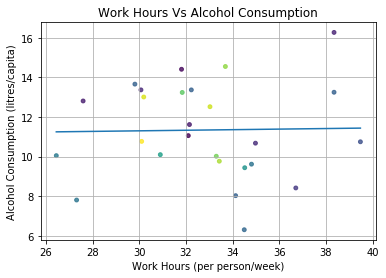

In [43]:
# Visualising the data and correlation using scatter plot. 
# The size of the bubbles are static and not influenced by any parameter. 
N = len(q2_pd)
x = q2_pd['Work Hours']
y = q2_pd['Alcohol Consumption']
colors = np.random.rand(N)
area = 15  # 0 to 15 point radius. This is static.

plt.scatter(x, y, s=area, c=colors, alpha=0.8)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('Work Hours (per person/week)')
plt.ylabel('Alcohol Consumption (litres/capita)')
plt.title('Work Hours Vs Alcohol Consumption')
plt.grid(True)
plt.show()

I think this question needs to be answer with broader data sets of Work Hours from more countries.

At this point, my hipothesis for subsequent analysis will be:
"There is a positive correlation on how work hours affect alcohol consumption in countries where work hours is extremely low or extremely high, which both leading to higher stress level. There is very weak correlation to none in countries where the working hours is quite balance around 30-36 hours/week*."

*There is a lot of company and countries these days that moving into implementing work hours per week within this range, as it might be the most optimal and productive range (eg. Amazon). Even though, I will not provide further research or facts to support that argument in this project (as the hipothesis is also for future project outside this one).

--------------------------------------------------------------------------------------------------------------------------------


##### Q3: Is there any correlation in between alcohol consumption and food consumption?

My initial hipothesis is: 
* H0: There is some negative correlation in between alcohol consumption and food consumption. Culturally wise, I've heard some countries tend to spend their social life over the food and some over the drinks.

Let's see what is the actual meaning of this expression.

To analyse this question, I will use two panda series, which are Alcohol Consumption and Food Consumption data from 2005. The analysis will be done using 1D data analysis approach.

When a country's population likes to drink alcohol, does it mean they will consume more alcohol instead of consuming more food? (or vice versa)? I will use the same approach and functions from question 1 (Q1), as the characteristic of the data are similar.

Since we are no longer using Work Hours data set, there will be more data points available in these two data sets than previous comparisons. It will represent more of the total population (out of those 195 countries) than just samples. Although, there might be a case where data for some countries are not available or no pairing data of the countries in the other serie. In this case, we need to remove these countries from the list and only use available data.

The rest of the approach will be done similarly in between two series as done in previous analysis for Q1 and Q2.

In [44]:
# Printing statistic properties of this serie before being processed further.
food_consumption_2005.describe()

count     176.000000
mean     2728.969034
std       503.555286
min      1566.410000
25%      2292.922500
50%      2738.990000
75%      3094.857500
max      3795.800000
Name: 2005, dtype: float64

In [45]:
# Printing statistic properties of this serie before being processed further.
alcohol_consumption_2005.describe()

count    188.000000
mean       6.540851
std        4.628977
min        0.020000
25%        2.582500
50%        5.990000
75%        9.777500
max       18.280000
Name: 2005, dtype: float64

In [46]:
# Only taking data for countries that have usable data in both series. 
q3_pd = pd.concat([food_consumption_2005, alcohol_consumption_2005], axis=1).dropna()
q3_pd.columns.values[0] = 'Food Consumption'
q3_pd.columns.values[1] = 'Alcohol Consumption'

q3_food_consumption = q3_pd.iloc[:,0]
q3_alcohol_consumption = q3_pd.iloc[:,1]

In [47]:
q3_pd.describe()

,Food Consumption,Alcohol Consumption
count,158.000000,158.000000
mean,2750.741076,6.734937
std,505.575685,4.512473
min,1567.580000,0.060000
25%,2302.905000,2.910000
50%,2757.145000,6.345000
75%,3127.670000,9.792500
max,3795.800000,18.220000


C:\Users\Sisi Florensia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


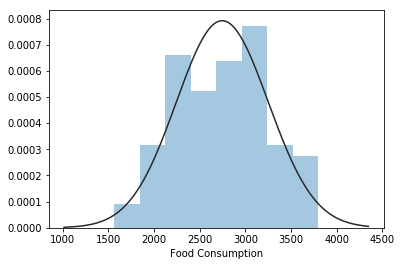

In [48]:
x = q3_food_consumption
sns.distplot(x, kde=False, fit=stats.gamma);

C:\Users\Sisi Florensia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


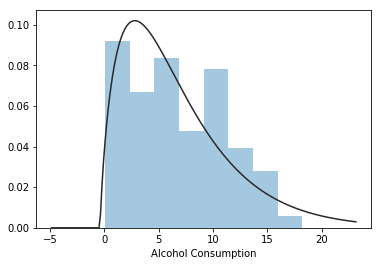

In [49]:
x = q3_alcohol_consumption
sns.distplot(x, kde=False, fit=stats.gamma);

From running describe function, we could see that initially there were 176 countries in Food Consumption date and 188 countries in Alcohol Consumption data. I was expecting there will be at least 80% of 176 countries data are available to be used for further analysis. After mapping countries in both series, there are 158 countries that we can use for analysis. 

The distribution of Food Consumption data set look relatively normal. However, while Alcohol Consumption data is quite right skewed and have some abnormal tail on the right. There might be a few outliers that we need to investigate.

Let's take a look at the data points distribution closer. This time, I will use scatterplot so I can get full overview on the data.

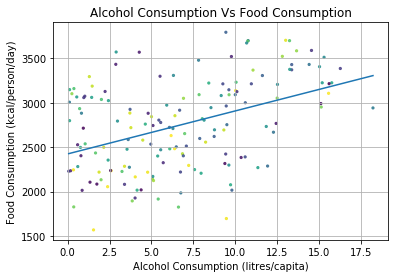

In [50]:
# Visualising the data and correlation using scatter plot. 
# The size of the bubbles are static and not influenced by any parameter. 
N = len(q3_pd)
x = q3_pd['Alcohol Consumption']
y = q3_pd['Food Consumption']
colors = np.random.rand(N)
area = 5  # 0 to 15 point radius. This is static.

plt.scatter(x, y, s=area, c=colors, alpha=0.8)
plt.xlabel('Alcohol Consumption (litres/capita)')
plt.ylabel('Food Consumption (kcal/person/day)')
plt.title('Alcohol Consumption Vs Food Consumption')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.grid(True)
plt.show()

Other than having more data on the lower part of the spectrum in alcohol consumption data (mostly due to muslim-majority countries, as narrated in previous question Q2), I don't see any abnormalities in the data. This could be due to the quality of the data itself.

In the Alcohol Consumption file from GapMinder, it comes with a caveat where it says that it was hard for them to estimate the average alcohol consumption due to uncertainties in the data availibility and the method they use. Especially, in countries with low GDP per capita. Also, as a reminder, that this is the data where only data from year 2005 and 2008 that are available, unlike the other indicators we used in this project.

Regardless, this is the data that I have at this moment as per Udacity project rubric as well. Therefore, I will proceed with this data to see their correlation using 1D method.

In [51]:
# Calculate how many countries that go to same direction and how many go their opposite way, using the function earlier.
indicators_correlation (q3_food_consumption,q3_alcohol_consumption)

(101, 57)

There are 101 out of 158 countries alcohol consumption and food consumption are both below or above the mean. This is almost 2/3 of our data. While in the rest 57 countries, alcohol consumption and food consumption level go oppposite way. This is about 1/3 our our data.

The result of some positive correlation in between two indicators, debunked my initial hipothesis. Based on this result, it seems in some countries where the alcohol consumption is higher, the food consumption is also higher. Although that may not always be the case. Also, there could be some issues with data accuracies as written earlier. The correlation result could be stronger or weaker if we could use more accurate data.

Let's see what we can see from Pearson correlation value. While it is not the best way to measure correlation of two simple data series, we can just quickly run this to compare the result with correlation analysis we did before.

In [52]:
q3_pd.corr()

,Food Consumption,Alcohol Consumption
Food Consumption,1.000000,0.432307
Alcohol Consumption,0.432307,1.000000


The Pearson value is also showing some positive correlation, though might not be strong. This is aligned with the previous analysis.



###### Q3 Conclusion

From the countries that we can investigate, there are some positive correlation in between the level of alcohol consumption and tendency of food consumption. Apparently, in some countries where people drink more, people tend to eat more. This is on contrary of my initial hipothesis. 

Apart from possibility of alcohol consumption data inaccuracies, it could be possible that the two indicators do not have a direct correlation, but might be correlated through other indicators that have strong positive correlations to both. In Q5 question later, I will explore further on correlation of these two indicators with GDP and life expectancies data that we also use in this project using 2D analysis. 

--------------------------------------------------------------------------------------------------------------------------------


##### Q4: How does food consumption in rich / poor countries affect life expectancies?

My initial hipothesis is:
* H0: There are relatively strong positive correlations in between three indicators. However, the relationship in between Food Consumption and Life Expectancies might be turned into negative correlation once the food consumption is beyond normal consumption.

To analyse this question, I will create a pandas DataFrame from 3 indicators, which are Food Consumption, GDP and Life Expectancies data from 2005. The analysis will be done using 2D data analysis approach.

We have printed out Food Consumption statistical data properties in the previous question, where we know that original data length of is 176. Let's see what are the original length of the other two data. 

In [53]:
len(gdp_2005)

194

In [54]:
len(life_expectancy_2005)

206

From running length of original data set, we could see that Food Consumption data have the shortest lenght. Therefore, I am expecting that the data of the other to will also be truncated at least to this length after matching countries names. Let's do the pairings and only use countries where the data is complete for all three parameters and see the outcome.

In [55]:
q4_df = pd.DataFrame(dict(food_consumption_2005 = food_consumption_2005, gdp_2005 = gdp_2005, \
                          life_expectancy_2005 = life_expectancy_2005)).dropna()
q4_df.describe()

,food_consumption_2005,gdp_2005,life_expectancy_2005
count,157.000000,157.000000,157.000000
mean,2744.636051,6830.296306,68.950955
std,515.689504,10458.578997,9.325383
min,1566.410000,92.370000,43.500000
25%,2294.690000,577.660000,62.000000
50%,2760.540000,1906.590000,72.000000
75%,3128.140000,6774.730000,75.800000
max,3795.800000,51927.360000,82.200000


I was expecting there will be at least 80% of 176 countries data are available to be used for further analysis. After mapping countries in both series, there are 157 countries that we can use for analysis. It's still within our requirements.

Let's take a look at the data points distribution. I will normalise all the data sets so we can present them in the same chart.

C:\Users\Sisi Florensia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


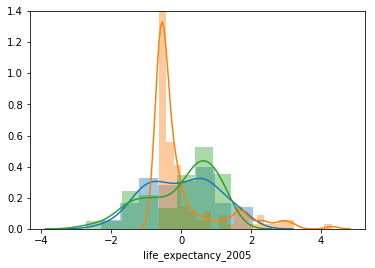

In [56]:
# Plot normalised value (using Z-score normalization) of columns.
# For this report, I will print all three chart together.
# To print each chart individuaLly, comment out the other two out of three statements below.
sns.distplot((q4_df['food_consumption_2005']-q4_df['food_consumption_2005'].mean())/q4_df['food_consumption_2005'].std())
sns.distplot((q4_df['gdp_2005']-q4_df['gdp_2005'].mean())/q4_df['gdp_2005'].std())
sns.distplot((q4_df['life_expectancy_2005']-q4_df['life_expectancy_2005'].mean())/q4_df['life_expectancy_2005'].std());

* The distribution of Food Consumption data is quite normal (just like it was in Q3 as well). 
* The distribution of GDP data is right skewed and heavy on the low GDP part. This is consistent with our analysis in Q1 Disclaimer. However, it looks like the data is quite accurate to represent inequality in the world.
* The distribution of Life Expectancies data is right skewed. This is the first time we use this data set in this project. Let's see closer on how it looks like, in case there's any abnormalities. I will print only the countries with low life expectancies (lower than mean - std).

In [57]:
# Print list of countries where the life expectancies are low.
q4_df['life_expectancy_2005'].loc[q4_df['life_expectancy_2005'] < \
                                  (q4_df['life_expectancy_2005'].mean()-q4_df['life_expectancy_2005'].std())]

Angola              56.0
Botswana            54.3
Burkina Faso        56.8
Burundi             53.8
Cameroon            55.2
Chad                53.6
Congo, Dem. Rep.    54.2
Congo, Rep.         56.1
Cote d'Ivoire       53.6
Eritrea             59.0
Ethiopia            56.8
Gabon               57.0
Guinea              57.3
Guinea-Bissau       50.9
Kenya               58.8
Lesotho             44.1
Liberia             59.3
Malawi              48.4
Mali                54.2
Mozambique          53.9
Namibia             51.9
Niger               57.3
Nigeria             56.9
Rwanda              57.3
Sierra Leone        54.4
South Africa        53.1
Swaziland           43.5
Tanzania            57.2
Togo                59.0
Uganda              54.5
Zambia              47.9
Zimbabwe            47.7
Name: life_expectancy_2005, dtype: float64

It looks like most of them are countries in Africa. I did some quick research to verify the information. For example countries like Swaziland and Lesotho face several health issues, including HIV/AIDS and tuberculosis and others caused by  poor nutrition and inadequate hygiene. In 2018 report from World Population Review, it says that Swaziland even have lower life expectancies than our data. With median age of 20.5 years with a life expectancy of just 31.88 years, the lowest documented life expectancy in the world and less than half the world average.

Looks like that the data we use is quite accurate. So, I will proceed further using the full set of this data to do the correlation analysis using Pearson.

In [58]:
q4_df.corr()

,food_consumption_2005,gdp_2005,life_expectancy_2005
food_consumption_2005,1.000000,0.612340,0.713614
gdp_2005,0.612340,1.000000,0.588063
life_expectancy_2005,0.713614,0.588063,1.000000


From the analysis above, it looks like there are quite strong positive correlations in between the indicators, where:
* The level of Life Expectancies is affected by the level of GDP. This is quite a popular analysis that has been done many times by others. It was proven that there is indeed a strong correlation in between them. In this analysis, I got a Pearson coefficient of 0.588. 
* The level of Life Expectancies is correlated with the level of Food Consumption. It relatively strong at 0.7136. Even stronger than the relationship in between life expectancies and GDP. 
* The level of Food Consumption is affected by the level of GDP. It relatively strong at 0.6123. It is also stronger than correlation in between life expectancies and GDP, but lower than life expectancies and food consumption.

While I do expect that they would have a positive correlations, I was not expecting that correlation in between Food Consumption and Life Expectancies will be higher than their relationship with GDP. However, all the correlation makes sense to me. 

There is one more aspect I would like to see from my previous hipothesis, is whether there correlation in between Food Consumption and Life Expectancy will go negative once the food consumption is excessive and on the extreme high. Researches have shown that in some countries (as in United States), excessive level of food consumption leads to epidemic obesities that cause many health problems, thus lower life expectancies.

Perhaps we can see a better visibility of data by plotting them into scatter plot.

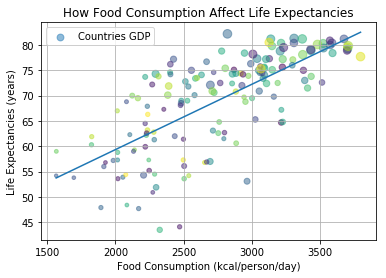

In [59]:
# Visualising the data and correlation using scatter plot. 
# The size of the bubbles are static and not influenced by any parameter. 
N = len(q4_df)
x = q4_df['food_consumption_2005']
y = q4_df['life_expectancy_2005']
colors = np.random.rand(N)
area = np.pi * (q4_df['gdp_2005'])**0.3  # This is to scale the size of the bubbles based on corresponding countries' GDP.

plt.scatter(x, y, s=area, c=colors, alpha=0.5, label='Countries GDP')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('Food Consumption (kcal/person/day)')           # and here ?
plt.ylabel('Life Expectancies (years)')          # and here ?
plt.title('How Food Consumption Affect Life Expectancies')   # and here ?
plt.legend()
plt.grid(True)
plt.show()

From the chart above, we can see a quite strong positive correlation in between Food Consumption, Life Expectancies and GDP. However, cases of extreme food consumption are not as visible. Overall, we can see that highest life expectancies is quite stagnant around 82 years. If we observe the chart on the extreme right, we could see a slight downturn on life expectancies one the food consumption goes beyond around 3700 kcal/person/day.

However, there is too few data points available for me to take this conclusion. Perhaps, this question is better analysed using individuals data, smaller scale and scope research, or more updated data points as there are more cases related to obesities these days compared to in 2005. 

For the sake of curiousity, I would like to know which countries are consuming more than 3700 kcal/person/day and how the trends look like.

In [60]:
# Select countries with extreme food consumption
q4_df_extreme_high_food_consumption = q4_df.loc[q4_df['food_consumption_2005'] > 3700]

In [61]:
q4_df_extreme_high_food_consumption

,food_consumption_2005,gdp_2005,life_expectancy_2005
Austria,3700.89,25370.47,79.6
Belgium,3701.60,24033.78,79.2
Luxembourg,3705.24,51927.36,79.8
United States,3795.80,37718.01,77.7


In [62]:
q4_df_extreme_high_food_consumption.corr()

,food_consumption_2005,gdp_2005,life_expectancy_2005
food_consumption_2005,1.000000,0.191096,-0.957162
gdp_2005,0.191096,1.000000,0.056935
life_expectancy_2005,-0.957162,0.056935,1.000000


As predicted, United States is on the top of the rank by almost consuming 3800 kcal/person/day. The Pearson value indicates that  excessive food consumptions is very strongly correlate to lower life expectancies, regardless the GDP level of the countries. Of course, that the analysis using Pearson value with only 4 entries would not be that accurate. However, it could be a good indicator to kickstart deeper investigation on this area using better type of data and distribution for this kind of question. 



##### Q4 Conclusion

Food consumption correlates relatively strong to level of GDP of the countries, which then also quite strongly correlates to Life Expectancies as well. It means, in richer countries, people most likely have higher level of food consumption, which subsequently also have higher Life Expectancies. And most likely, the trends in poorer countries go the opposite direction.

Although, in a case of extremely high food consumption level, the trend starts to go the opposite way, regardless the level of GDP. Due to limitation of the data set, this follow up question could not be analysed throughly within this project. 



--------------------------------------------------------------------------------------------------------------------------------


##### Q5: Is there any surprising result in between all these indicators?

To analyse this question,  I will start by creating a pandas DataFrame consist of all indicators in 2005, except for Work Hours, and apply generic correlation using Pearson (coefficient R). Work hours data set is excluded due to its limited number data points and coverage. Also, it would just cause our other data set to be truncated to its length, which is not something that would be helpful for our analysis.

In [63]:
# Create a DataFrame with all four indicators (Work Hours is excluded)
q5_df = pd.DataFrame(dict(gdp_2005 = gdp_2005, food_consumption_2005 = food_consumption_2005, \
                           alcohol_consumption_2005 = alcohol_consumption_2005, \
                           life_expectancy_2005 = life_expectancy_2005)).dropna()

q5_df.describe()

,alcohol_consumption_2005,food_consumption_2005,gdp_2005,life_expectancy_2005
count,151.000000,151.000000,151.000000,151.000000
mean,6.700927,2756.457351,7011.237815,68.974834
std,4.583946,514.507352,10616.347263,9.321783
min,0.060000,1567.580000,128.300000,43.500000
25%,2.730000,2296.590000,560.510000,62.100000
50%,6.310000,2768.000000,1977.740000,71.900000
75%,9.900000,3142.800000,7081.045000,75.900000
max,18.220000,3795.800000,51927.360000,82.200000


I was expecting there will be at least 80% of 176 countries (Food Consumption's length as it is the shortest data set) are available to be used for further analysis. After mapping countries in all four series, there are 151 countries that we can use for analysis. It's still within our requirements. Also, from it's statistic above, there is no abnormalities I can spot so far.

Let's take a look at the data points distribution. I will normalise all the data sets so we can present them in the same chart.

C:\Users\Sisi Florensia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


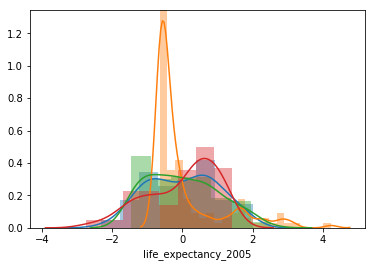

In [64]:
# Plot normalised value (using Z-score normalization) of columns.
# For this report, I will print all the chart together.
# To print each chart individuaLly, comment out the other three out of four statements below.
sns.distplot((q5_df['food_consumption_2005']-q5_df['food_consumption_2005'].mean())/q5_df['food_consumption_2005'].std())
sns.distplot((q5_df['gdp_2005']-q5_df['gdp_2005'].mean())/q5_df['gdp_2005'].std())
sns.distplot((q5_df['alcohol_consumption_2005']-q5_df['alcohol_consumption_2005'].mean())/q5_df['alcohol_consumption_2005'].std())
sns.distplot((q5_df['life_expectancy_2005']-q5_df['life_expectancy_2005'].mean())/q5_df['life_expectancy_2005'].std());

The distributions look a similar to the one in Q4 (where 3 out 4 indicators in this question were used). There is nothing really surprising in the distribution apart from what had been addressed in previous questions.

In [65]:
q5_df.corr()

,alcohol_consumption_2005,food_consumption_2005,gdp_2005,life_expectancy_2005
alcohol_consumption_2005,1.000000,0.441876,0.342386,0.276680
food_consumption_2005,0.441876,1.000000,0.613707,0.718033
gdp_2005,0.342386,0.613707,1.000000,0.597093
life_expectancy_2005,0.276680,0.718033,0.597093,1.000000


Most of the relationships in between indicators were investigated in previous questions. This correlation analysis is consistent with previous analyses, where they have notable positive correlation in between each others. By including alcohol consumption indicators, it seems that it support stronger correlations, even only by few decimal points (more or less around 0.01).

What surprises me, is the positive correlation in between Alcohol Consumption and Life Expectancies. Eventhough the correlation is not that strong, it is still somehow could back up that expression where people randomly says "Drink alcohol for a longer life". It is something that does not really make sense, but if this analysis checked out, it could be partly true.

However, it could also be that these life expectancies is more affected more by other factors, eg. by GDP and Food Consumption, instead of alcohol consumption itself (as shown by the correlation coefficients above). Perhaps, we could try to isolate the data using few paramaters, and ask more define question. For example:
* Q5b: In countries where GDP is below the mean and alcohol consumption is above the mean, how would alcohol consumption affect life expectancies? 

I exclude the countries with high GDP to reduce bias of availability of good health care system in these countries. I also isolate out the countries with alcohol consumption below the mean, so we can filter out muslim-majority countries where alcohol consumption is prohibited more by religion. This way, we can also focus to see apparent effect of notable alcohol consumption.

In [66]:
# Isolating dataset, only taking low GDP countries with high alcohol consumption.
q5_df_gdp_below_mean = q5_df.loc[q5_df['gdp_2005'] < q5_df['gdp_2005'].mean()]
q5_df_gdp_below_mean_and_alc_above_mean = q5_df_gdp_below_mean.loc[q5_df['alcohol_consumption_2005'] \
                                                                   > q5_df_gdp_below_mean['alcohol_consumption_2005'].mean()]

In [67]:
q5_df_gdp_below_mean_and_alc_above_mean.describe()

,alcohol_consumption_2005,food_consumption_2005,gdp_2005,life_expectancy_2005
count,49.000000,49.000000,49.000000,49.000000
mean,10.055918,2710.888163,2680.243878,67.351020
std,3.323941,436.784736,2058.287935,8.280452
min,6.070000,1695.730000,128.300000,51.900000
25%,7.080000,2402.690000,989.280000,57.300000
50%,9.460000,2723.530000,2260.220000,70.600000
75%,12.280000,3053.770000,4431.130000,73.800000
max,18.220000,3513.690000,6967.470000,78.400000


In [68]:
q5_df_gdp_below_mean_and_alc_above_mean.corr()

,alcohol_consumption_2005,food_consumption_2005,gdp_2005,life_expectancy_2005
alcohol_consumption_2005,1.000000,0.537043,0.150220,0.105833
food_consumption_2005,0.537043,1.000000,0.473710,0.519852
gdp_2005,0.150220,0.473710,1.000000,0.540003
life_expectancy_2005,0.105833,0.519852,0.540003,1.000000


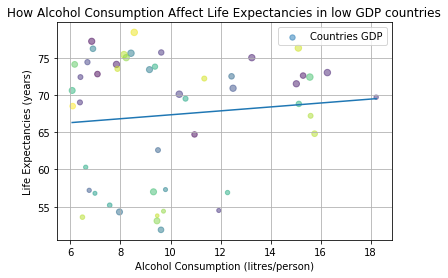

In [69]:
N = len(q5_df_gdp_below_mean_and_alc_above_mean)
x = q5_df_gdp_below_mean_and_alc_above_mean['alcohol_consumption_2005']
y = q5_df_gdp_below_mean_and_alc_above_mean['life_expectancy_2005']
colors = np.random.rand(N)
area = np.pi * (q5_df_gdp_below_mean_and_alc_above_mean['gdp_2005'])**0.3

plt.scatter(x, y, s=area, c=colors, alpha=0.5, label='Countries GDP')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('Alcohol Consumption (litres/person)') 
plt.ylabel('Life Expectancies (years)') 
plt.title('How Alcohol Consumption Affect Life Expectancies in low GDP countries') 
plt.legend()
plt.grid(True)
plt.show()

We could see that by isolating the parameters, the positive correlation in between Alcohol Consumption and Life Expectancies is significantly less to a very weak correlation. I wonder if the life expectancies here is still affected by extreme low or high food consumption than the alcohol itself. 

How would the correlation would be if we also isolate parameter Food Consumption and only include countries where food consumption is moderate or not an issue. I will rephrase the question:
* Q5c: In countries where food consumption is not an issue, and GDP is below the mean and alcohol consumption is above the mean, how would alcohol consumption affect life expectancies?

In [70]:
# Isolating dataset to include only countries with moderate food consumption as well.
q5_df_gdp_below_mean_and_alc_above_mean_foodabovemean = \
q5_df_gdp_below_mean_and_alc_above_mean.loc[q5_df_gdp_below_mean_and_alc_above_mean['food_consumption_2005'] \
                                            > (q5_df_gdp_below_mean_and_alc_above_mean['food_consumption_2005'].mean()\
                                               - q5_df_gdp_below_mean_and_alc_above_mean['food_consumption_2005'].std())]
q5_df_gdp_below_mean_and_alc_above_mean_foodmoderate = \
q5_df_gdp_below_mean_and_alc_above_mean_foodabovemean.loc[q5_df_gdp_below_mean_and_alc_above_mean['food_consumption_2005'] \
                                            < (q5_df_gdp_below_mean_and_alc_above_mean['food_consumption_2005'].mean()\
                                               + q5_df_gdp_below_mean_and_alc_above_mean['food_consumption_2005'].std())]

In [71]:
q5_df_gdp_below_mean_and_alc_above_mean_foodmoderate.describe()

,alcohol_consumption_2005,food_consumption_2005,gdp_2005,life_expectancy_2005
count,33.000000,33.000000,33.000000,33.000000
mean,9.482424,2725.653333,2877.242424,68.821212
std,3.142850,261.622639,2019.406238,8.016419
min,6.070000,2287.620000,252.210000,51.900000
25%,6.900000,2503.740000,1185.380000,68.500000
50%,9.160000,2723.530000,2359.640000,72.400000
75%,10.600000,2952.870000,4431.130000,74.100000
max,18.220000,3107.330000,6967.470000,78.400000


In [72]:
q5_df_gdp_below_mean_and_alc_above_mean_foodmoderate.corr()

,alcohol_consumption_2005,food_consumption_2005,gdp_2005,life_expectancy_2005
alcohol_consumption_2005,1.000000,0.390202,0.077658,-0.056222
food_consumption_2005,0.390202,1.000000,0.269305,0.288385
gdp_2005,0.077658,0.269305,1.000000,0.439369
life_expectancy_2005,-0.056222,0.288385,0.439369,1.000000


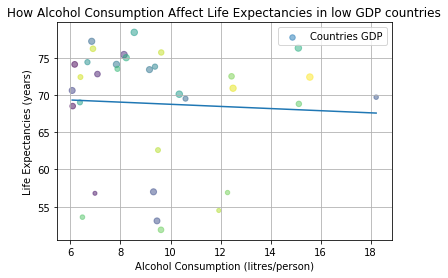

In [73]:
# Visualising the data and correlation using scatter plot. 
# The size of the bubbles are static and not influenced by any parameter. 
N = len(q5_df_gdp_below_mean_and_alc_above_mean_foodmoderate)
x = q5_df_gdp_below_mean_and_alc_above_mean_foodmoderate['alcohol_consumption_2005']
y = q5_df_gdp_below_mean_and_alc_above_mean_foodmoderate['life_expectancy_2005']
colors = np.random.rand(N)

# This is to scale the size of the bubbles based on corresponding countries' GDP.
area = np.pi * (q5_df_gdp_below_mean_and_alc_above_mean_foodmoderate['gdp_2005'])**0.3 

plt.scatter(x, y, s=area, c=colors, alpha=0.5, label='Countries GDP')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('Alcohol Consumption (litres/person)') 
plt.ylabel('Life Expectancies (years)') 
plt.title('How Alcohol Consumption Affect Life Expectancies in low GDP countries') 
plt.legend()
plt.grid(True)
plt.show()

We have 33 countries left that we can use for the analysis after further isolation. We could see that by isolating GDP and Food Consumption parameters, the correlation of Life Expectancies to those two indicators have been reduced significantly. On the other side, we can also see how previously positive correlation in between Alcohol Consumption and Life Expectancies has disappeared. In fact, it starts to show negative correlation, even though at this stage it is barely visible with -0.056 coefficient R. Perhaps, with more up to date data and better isolations, we could do more rigorous analysis and draw better conclusion. Especially, there are some other factors that could affect alcohol consumption, such as government tax and regulation, weather, culture, etc.

The scatter plot mostly support the argument where there is no correlation in between two indicators, as the data are mapped quite randomly. Regardless, it is still surprising to see that even in the scatter plot from recent isolated data set above, it seems that countries where the alcohol consumption is above the mean, also have life expectancies above the mean. Perhaps, alcohol is not that bad after all!



##### Q5 Conclusion

In general, the correlations ran on the Data Frame across 4 indicators (apart from Work Hours) are aligned with the analyses and conclusions done on previous questions. In fact, Pearson correlation coefficient is even stronger than in previous analyses.

This is the first time in this project where Alcohol Consumption is being compared directly. The initial result is quite surprising, given it shows that there is a positive correlation in increased alcohol consumption and life expectancies, even though the correlation is relatively weak.

However, from running the correlation across whole 4 indicators (apart from Work Hours), we could see that Life Expectancies is affected quite strongly by GDP and Food Consumption. By reducing its correlation to GDP and Food Consumption through isolation of selected data, we could see how the correlation in between Alcohol Consumption and Life Expectancies is shifting toward none to negative correlation. Although, from the data that we have at hand, we are not able to isolate it further and do more comprehensive analysis to be able to see real correlation in between Alcohol Consumption and Life Expectancies. Or simply, these are not the best type of data to be used to analyse the correlation in between Alcohol Consumption and Life Expectancies.

Apart from that, since in most countries Alcohol is a regulated commodities, perhaps this also could affect the result of analysis. Even in Gapminder's data that we use, they declared the difficulties in estimating the alcohol consumptions due to many factors. Until we can get more complete and accurate data set, we would not be able to run a good analysis on this.   